# 

In [61]:
import random
import cv2
from torchvision import datasets, transforms, models
from matplotlib import pyplot as plt
import albumentations as A

In [10]:
def visualize(image):
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(image)

In [2]:
image = cv2.imread('../../dataset/cityscape/leftImg8bit/train/aachen/aachen_000004_000019_leftImg8bit.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [43]:
transform = A.Compose(
    [A.ZoomBlur(blur_limit=57, p=1)],
)

C:\Users\44894\AppData\Local\Temp\ipykernel_10984\2309227655.py:2: UserWarning: Argument 'blur_limit' is not valid and will be ignored.
  [A.ZoomBlur(blur_limit=57, p=1)],


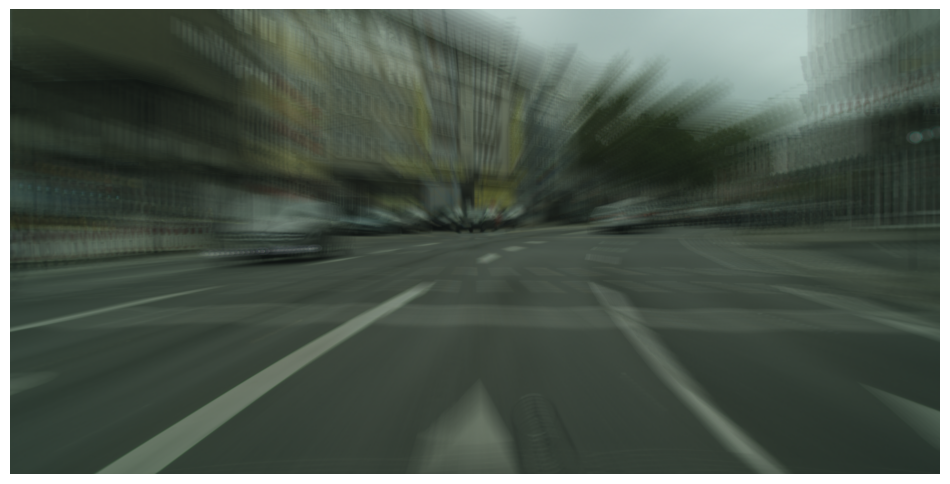

In [44]:
transformed = transform(image=image)
visualize(transformed['image'])

In [45]:
import segmentation_models_pytorch as smp

In [46]:
unet = smp.Unet(in_channels=4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\44894/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:04<00:00, 18.9MB/s]


UnetDecoder(
  (center): Identity()
  (blocks): ModuleList(
    (0): DecoderBlock(
      (conv1): Conv2dReLU(
        (0): Conv2d(768, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (attention1): Attention(
        (attention): Identity()
      )
      (conv2): Conv2dReLU(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (attention2): Attention(
        (attention): Identity()
      )
    )
    (1): DecoderBlock(
      (conv1): Conv2dReLU(
        (0): Conv2d(384, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplac

In [1]:
import os
import pandas as pd
import warnings
from tqdm import  tqdm
from PIL import Image
import torch
import glob
import torchvision
from torch.utils.data import Dataset

In [3]:
class QualityDataset(Dataset):
    def __init__(self,mode,transform=None):
        # self.root = root
        self.transform = transform
        if mode == 'train':
            self.img_list = glob.glob('D:/dataset/cityscape/*/leftImg8bit/*/*/*.png')+\
                            glob.glob('D:/dataset/cityscape/*/leftImg8bit_rain/train/*/*.png')+\
                            glob.glob('D:/dataset/cityscape/*/leftImg8bit_foggy/train/*/*.png')
        else:
            self.img_list = glob.glob('D:/dataset/val_quality/*/*.jpg')

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self,index):

        img_path = self.img_list[index]
        img_name = os.path.basename(img_path).split('.')[0]
        if 'rain' in img_name or 'foggy' in img_name:
            label = 0
        else:
            label = 1
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)

        return img,label

In [46]:
custom = QualityDataset(mode = 'train')

In [57]:
img,label = custom.__getitem__(20803)

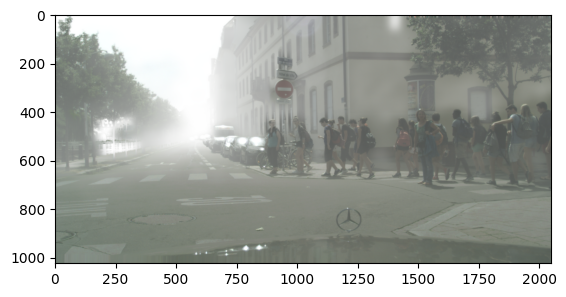

In [58]:
plt.imshow(img)

In [64]:
import warnings
from tqdm import  tqdm
from PIL import Image
import torch
import glob
import torchvision
from torch.utils.data import Dataset, DataLoader,random_split
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from dataset import QualityDataset

In [91]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

def infer(img_path):
    class_map = {0:'low quality',1:'good quality'}
    # model = torchvision.models.resnet18(pretrained=False)
    # num_ftrs = model.fc.in_features
    # model.fc = nn.Linear(num_ftrs, 2)
    # model.load_state_dict(torch.load('models/model_state.pth'))
    # model.eval()
    img = Image.open(img_path).convert('RGB')
    transform = data_transforms['val']
    img = transform(img)
    img = torch.unsqueeze(img,0)
    _,preds = torch.max(model(img),1)
    return class_map[preds.item()]

In [92]:
infer('D:/dataset/val_quality/30cm_10_normal_2/30cm_10_normal_2_1800.jpg')

'good quality'

In [88]:
_,preds = torch.max(infer('D:/dataset/cityscape/cityscape/leftImg8bit/train/bochum/bochum_000000_000600_leftImg8bit.png'),1)

In [90]:
preds.item()

1

In [81]:
model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load('models/model_state.pth'))
model.eval()

D:\python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [95]:
for img in glob.glob('D:/dataset/val_quality/30cm_40_normal/*.jpg'):
    print(infer(img))

good quality
good quality
good quality
good quality
good quality
